# Question 4: Logistic Regression

In [155]:
#Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [156]:
# load the data
# Perform important operations on the data

X = pd.concat( map(pd.read_csv, ['class0-input.csv', 'class1-input.csv']), ignore_index=True)
print(X)


labels= pd.read_csv('labels.csv')

print("labels size = ",labels.size)


            x1        x2
0    -0.201517 -0.683358
1     0.374519 -0.828082
2    -0.161895 -1.247107
3     0.037711 -0.047303
4    -0.260479  1.770204
...        ...       ...
9995 -1.285488  2.922818
9996  1.440506  4.047713
9997  2.325596  4.181329
9998  0.247073  4.229404
9999  1.719022  4.825350

[10000 rows x 2 columns]
labels size =  10000


## Check the shape

In [157]:
# Shape of X
# Shape of Y (labels)

print("Shape of X= ", np.shape(X))
print("Shape of Labels= ", np.shape(labels))



Shape of X=  (10000, 2)
Shape of Labels=  (10000, 1)


## Visualize the data

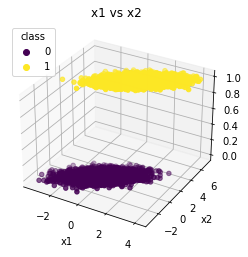

In [244]:
# Use different colors for each class
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend

ax = plt.axes(projection='3d')
plot = ax.scatter(X['x1'],X['x2'],labels.values,c=labels.values)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('x1 vs x2')
plt.legend(handles=plot.legend_elements()[0],labels=[0,1],title="class")

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


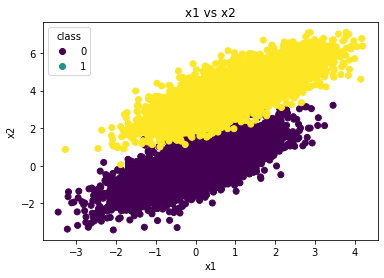

In [359]:
plt.scatter(X['x1'],X['x2'],c=labels.values)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('x1 vs x2')
plt.legend(handles=plot.legend_elements()[0],labels=[0,1],title="class")

print(labels.values)

## Define the required functions

In [339]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(x):
    y= 1/(1 + np.exp(-x))
    return y

In [403]:
# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(h,X,y):
    gradient = np.sum(np.dot(X.T, (h - y))) / y.size
    b_g = np.mean(h-y)

    return gradient,b_g

In [404]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    weight = prev_weights - np.dot(learning_rate,current_grads)
    return weight
        
        
    

In [427]:
# Use the implemented functions in the main function
# 'main' function should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weights randomly
def main(X, Y, weights, learning_rate = 0.00005, num_steps = 50000):
    W=[]
    W.append(weights)
    bias = np.random.randint(-50,50,1)
    B=[]

    for i in range(num_steps):
            z= np.dot(X,weights)+bias
            h = sigmoid(z)
            gradient,bias_gradient= calculate_gradients(h,X,Y)
            weights = update_weights(weights, gradient, learning_rate)
            bias = update_weights(bias, bias_gradient, learning_rate)
            W.append(weights)
            B.append(bias)
    return W,B

In [428]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(weight,bias,X):
    threshold = .5
    z= np.dot(X,weights)+bias
    return (sigmoid(z) >= threshold)*1



In [429]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels
np.random.seed(24787)
a = np.random.randint(0,100,2)

a=[90,5]
W,B = main(X,labels['label'],a)

P = predict(W[-1],B[-1],X)

Q=(P!=labels['label'])*1

accuracy = 1-(np.sum(Q)/labels.size)

print('Accuracy=',accuracy)






Accuracy= 0.9249


## Visualize the misclassification

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: label, Length: 10000, dtype: int32


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: label, Length: 10000, dtype: int32

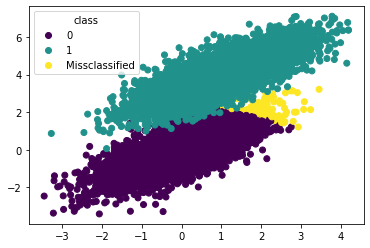

In [434]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
print(Q)
L = Q.values + P
plot = plt.scatter(X['x1'],X['x2'],c=L)
plt.legend(handles=plot.legend_elements()[0],labels=[0,1,'Missclassified'],title="class")
Q


## Compare the results with sklearn's Logistic Regression

C:\Users\anu22\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'x1 vs x2')

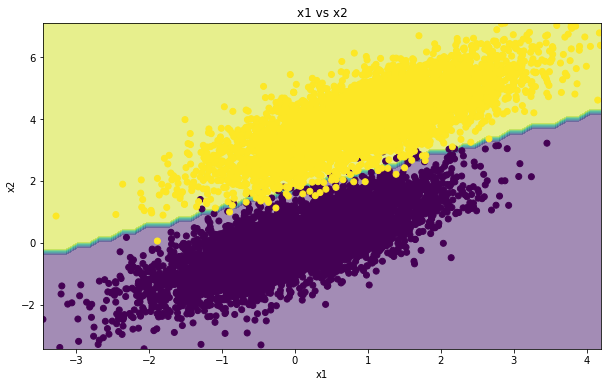

In [436]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e20)
model.fit(X, labels['label'])
y=labels.values
preds = model.predict(X)
(preds == y ).mean()
model.intercept_, model.coef_

#original plot
#ax = plt.axes(projection='3d')
plt.figure(figsize=(10, 6))

x1_min, x1_max = X['x1'].min(), X['x1'].max(),
x2_min, x2_max = X['x2'].min(), X['x2'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict(grid).reshape(xx1.shape)
plt.contourf(xx1, xx2, probs,alpha=.5);
plt.scatter(X['x1'],X['x2'],c=labels.values)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('x1 vs x2')

In [437]:
#accuracy:
Q=(preds!=labels['label'])*1
accuracy = 1-(np.sum(Q)/labels.size)
print('Accuracy=',accuracy)


Accuracy= 0.9948


COMPARISON

The sklearn model has an accuracy of about .99 but logistic model built from scratch has a accuracy of .92, which is much lower. This could be due to the fact that the bias parameter and weights calculted in the hardcoded model may not be optimised to their full potential (since gradient decent does depend on starting position which initialised randomly in my function).